importing dependencies

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

reading dataset

In [86]:
df = pd.read_csv('../data-processed/crop_recommendation.csv')

In [87]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,61,50,44,20.879744,82.002744,6.502985,202.935536,rice
1,81,57,41,21.770462,80.319644,7.038096,226.655537,rice
2,85,41,45,23.004459,82.320763,7.840207,263.964248,rice
3,90,47,43,26.491096,80.158363,6.980401,242.864034,rice
4,82,37,35,20.130175,81.604873,7.628473,262.717340,rice


In [88]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
1695,115,19,55,25.287846,89.636679,6.765095,58.286977,watermelon
1696,112,13,55,26.638386,84.695469,6.189214,48.324286,watermelon
1697,99,21,51,25.331045,84.305338,6.904242,41.532187,watermelon
1698,91,19,52,26.897502,83.892415,6.463271,43.971937,watermelon
1699,114,9,49,26.986037,89.413849,6.260839,58.548767,watermelon


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1700 non-null   int64  
 1   P            1700 non-null   int64  
 2   K            1700 non-null   int64  
 3   temperature  1700 non-null   float64
 4   humidity     1700 non-null   float64
 5   ph           1700 non-null   float64
 6   rainfall     1700 non-null   float64
 7   label        1700 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 106.4+ KB


In [90]:
df.size

13600

In [91]:
df.shape

(1700, 8)

In [92]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [93]:
df['label'].unique()

array(['rice', 'maize', 'jute', 'coffee', 'cotton', 'kidneybeans',
       'coconut', 'blackgram', 'banana', 'grapes', 'apple', 'mango',
       'muskmelon', 'orange', 'papaya', 'pomegranate', 'watermelon'],
      dtype=object)

In [94]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [95]:
df['label'].value_counts()

label
rice           100
grapes         100
pomegranate    100
papaya         100
orange         100
muskmelon      100
mango          100
apple          100
banana         100
maize          100
blackgram      100
coconut        100
kidneybeans    100
cotton         100
coffee         100
jute           100
watermelon     100
Name: count, dtype: int64

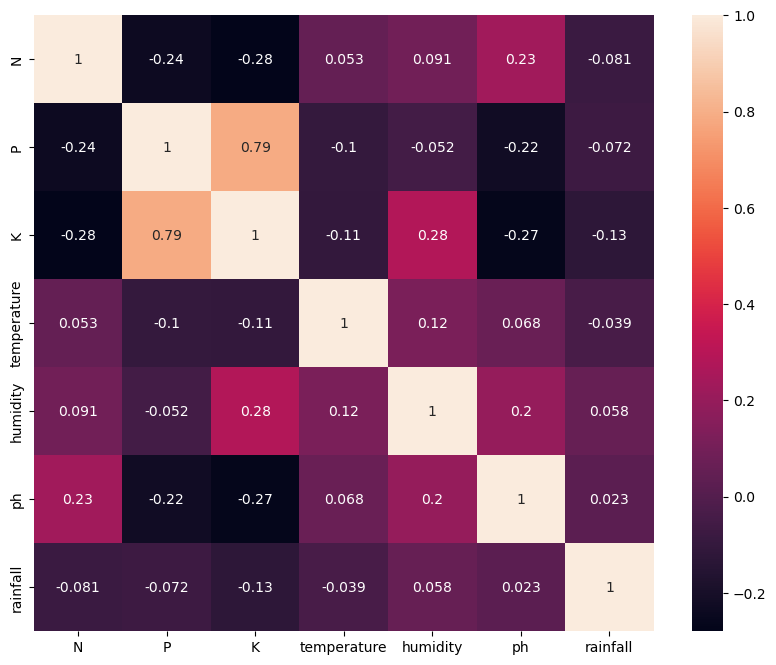

In [96]:
# Select only numeric columns for the correlation matrix
numeric_data = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True)
plt.show()

# Seperating features and target label


In [97]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']

In [98]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [99]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [100]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)

# Calculate and Store Accuracy
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))


DecisionTrees's Accuracy is:  95.58823529411765
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        14
      banana       1.00      1.00      1.00        23
   blackgram       1.00      1.00      1.00        13
     coconut       1.00      1.00      1.00        17
      coffee       1.00      0.96      0.98        24
      cotton       1.00      0.94      0.97        17
      grapes       1.00      1.00      1.00        24
        jute       0.62      1.00      0.77        20
 kidneybeans       1.00      1.00      1.00        23
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        22
   muskmelon       1.00      1.00      1.00        28
      orange       1.00      1.00      1.00        22
      papaya       1.00      0.71      0.83        21
 pomegranate       1.00      1.00      1.00        13
        rice       0.87      0.65      0.74        20
  watermelon       1.00      1.00

In [101]:
from sklearn.model_selection import cross_val_score

In [102]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [103]:
score

array([0.92058824, 0.96764706, 0.93235294, 0.95882353, 0.95294118])

# Saving trained Decision Tree model


In [124]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = '../models/DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes


In [104]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9882352941176471
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        14
      banana       1.00      1.00      1.00        23
   blackgram       1.00      1.00      1.00        13
     coconut       1.00      1.00      1.00        17
      coffee       1.00      1.00      1.00        24
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        24
        jute       0.83      1.00      0.91        20
 kidneybeans       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        22
   muskmelon       1.00      1.00      1.00        28
      orange       1.00      1.00      1.00        22
      papaya       1.00      1.00      1.00        21
 pomegranate       1.00      1.00      1.00        13
        rice       1.00      0.80      0.89        20
  watermelon       1.00      1.00 

In [105]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99705882, 0.99705882, 0.99411765, 0.99705882, 0.98823529])

# Saving trained Guassian Naive Bayes model


In [125]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = '../models/NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [106]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9852941176470589
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        14
      banana       1.00      1.00      1.00        23
   blackgram       0.93      1.00      0.96        13
     coconut       1.00      1.00      1.00        17
      coffee       1.00      1.00      1.00        24
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        24
        jute       0.83      1.00      0.91        20
 kidneybeans       1.00      1.00      1.00        23
       maize       1.00      0.95      0.97        20
       mango       1.00      1.00      1.00        22
   muskmelon       1.00      1.00      1.00        28
      orange       1.00      1.00      1.00        22
      papaya       1.00      1.00      1.00        21
 pomegranate       1.00      1.00      1.00        13
        rice       1.00      0.80      0.89        20
  watermelon       1.00      1.00      1.0

In [107]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.99117647, 0.98529412, 0.99117647, 0.98529412, 0.97647059])

# Saving trained SVM model

In [126]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = '../models/SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Logistic Regression


In [108]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9705882352941176
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        14
      banana       1.00      1.00      1.00        23
   blackgram       0.93      1.00      0.96        13
     coconut       1.00      1.00      1.00        17
      coffee       1.00      1.00      1.00        24
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        24
        jute       0.79      0.95      0.86        20
 kidneybeans       1.00      1.00      1.00        23
       maize       0.95      0.90      0.92        20
       mango       1.00      0.95      0.98        22
   muskmelon       1.00      1.00      1.00        28
      orange       1.00      1.00      1.00        22
      papaya       0.95      0.90      0.93        21
 pomegranate       1.00      1.00      1.00        13
        rice       0.94      0.80      0.86        20
  watermelon       1.00   

In [109]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.97647059, 0.98235294, 0.96470588, 0.97058824, 0.95294118])

# Saving trained Logistic Regression model


In [130]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = '../models/LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest


In [110]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9911764705882353
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        14
      banana       1.00      1.00      1.00        23
   blackgram       1.00      1.00      1.00        13
     coconut       1.00      1.00      1.00        17
      coffee       1.00      1.00      1.00        24
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        24
        jute       0.87      1.00      0.93        20
 kidneybeans       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        22
   muskmelon       1.00      1.00      1.00        28
      orange       1.00      1.00      1.00        22
      papaya       1.00      1.00      1.00        21
 pomegranate       1.00      1.00      1.00        13
        rice       1.00      0.85      0.92        20
  watermelon       1.00      1.00      1.00

In [111]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99705882, 0.98823529, 0.99117647, 0.99411765, 0.99117647])

# Saving trained Random Forest model


In [128]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = '../models/RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# XGBoost


In [117]:
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report
import xgboost as xgb

# Encode labels
label_encoder = LabelEncoder()
Ytrain_encoded = label_encoder.fit_transform(Ytrain)
Ytest_encoded = label_encoder.transform(Ytest)

# Initialize and train the XGBoost classifier
XB = xgb.XGBClassifier()
XB.fit(Xtrain, Ytrain_encoded)

# Predict using the test set
predicted_values_encoded = XB.predict(Xtest)

# Decode predictions back to original labels if needed
predicted_values = label_encoder.inverse_transform(predicted_values_encoded)

# Calculate accuracy and append to lists
x = metrics.accuracy_score(Ytest_encoded, predicted_values_encoded)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x * 100)

# Print classification report
print(classification_report(Ytest_encoded, predicted_values_encoded, target_names=label_encoder.classes_))


XGBoost's Accuracy is:  98.82352941176471
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        14
      banana       1.00      1.00      1.00        23
   blackgram       1.00      0.92      0.96        13
     coconut       1.00      1.00      1.00        17
      coffee       1.00      1.00      1.00        24
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        24
        jute       0.87      1.00      0.93        20
 kidneybeans       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        22
   muskmelon       1.00      1.00      1.00        28
      orange       0.96      1.00      0.98        22
      papaya       1.00      1.00      1.00        21
 pomegranate       1.00      1.00      1.00        13
        rice       1.00      0.85      0.92        20
  watermelon       1.00      1.00      

In [119]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import xgboost as xgb

# Encode target labels
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Initialize the XGBoost classifier
XB = xgb.XGBClassifier()

# Perform cross-validation
score = cross_val_score(XB, features, target_encoded, cv=5)

print("Cross-validation scores:", score)
print("Mean cross-validation score:", score.mean())

Cross-validation scores: [0.99705882 0.98823529 0.99411765 0.99705882 0.98529412]
Mean cross-validation score: 0.9923529411764707


# Saving trained XGBoost model


In [129]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = '../models/XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

# Accuracy Comparison


<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

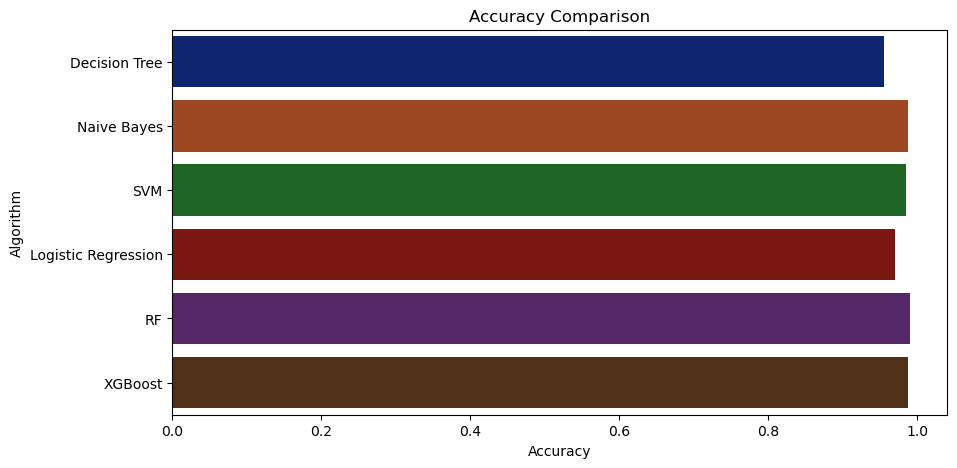

In [120]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [121]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9558823529411765
Naive Bayes --> 0.9882352941176471
SVM --> 0.9852941176470589
Logistic Regression --> 0.9705882352941176
RF --> 0.9911764705882353
XGBoost --> 0.9882352941176471


# Making a prediction


In [122]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [123]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['jute']
